#### MeanShift 클러스터링 알고리즘을 사용하여 생성된 데이터에 대해 클러스터링을 수행하고 그 결과를 시각화하는 과정을 수행한다.

In [6]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt


In [2]:
# 데이터 생성
centers = [[1, 1], [-1, -1], [1, -1]]
# 가우시안 정규 분포를 이용해서 합성 데이터를 생성한다 
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [4]:
len(X)

10000

In [5]:
#  MeanShift 클러스터링을 위한 적절한 밴드폭(클러스터의 "반경")을 추정한다. 
# 클러스터링의 세부적인 정도를 결정한다. 
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# MeanShift 클러스터링 수행
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


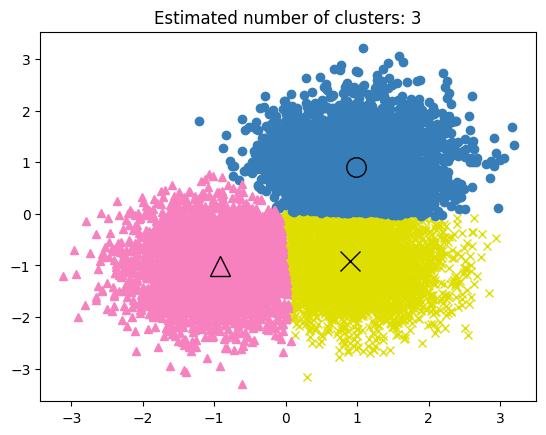

In [7]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

# clustering 결과 시각화 
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()